# MATH 60210 

# Nasim Siami

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import statsmodels.api as sm
import scipy.stats as ss
import matplotlib as mpl
import matplotlib.pyplot as plt

RawData = pd.read_excel('PSet_1_H2022.xlsx', index_col=0, parse_dates=True)

## Question 2 - Measuring Risk

### Part a

Write a function that accepts

- a 1-D array-like object of returns data $(Y)$
- a real value $\alpha$ such that $0 \lt \alpha \lt 1$

and returns estimates of $Y$\'s

- $VaR_{\alpha}$
- $ES_{\alpha}$

using historical simulation.



In [2]:
def Q2a_HS(df, p):  # modify function name and parameters
    """
    Calculate the VaR and the ES of df at probability p
    """
    ### BEGIN SOLUTION
    VaR = np.quantile(df, p)
    ES = np.mean(df[df <= VaR])
    ### END SOLUTION
    return VaR, ES

In [3]:
for p in np.linspace(0.05, 0.95, num=10):
    TheVaR, TheES = Q2a_HS(npr.random(size=200), p)
    assert TheVaR > TheES
    assert np.isclose(TheVaR, p, atol=0.1)

### BEGIN HIDDEN TESTS
# students will NOT see these extra tests
for p in np.linspace(0.05, 0.95, num=10):
    junk = npr.random(size=200)
    TheVaR, TheES = Q2a_HS(junk, p)
    assert TheES == np.mean(junk[junk < TheVaR])
### END HIDDEN TESTS

### Part b

Write a function that accepts

- a 1\-D array\-like object of returns data \($Y$\)
- a 2-D array-like object containing regressors ($X$)<br>(including a constant if one is desired)
- a real value $\alpha$ such that $0 \lt \alpha \lt 1$

and returns a 1-D array-like object of $VaR_{\alpha}$ estimates based on 

- an OLS regression of $Y$ on $X$, and 
- the assumption that regression errors $\hat{e}_t \sim i.i.d. \; N(0,\hat{\sigma}_{OLS})$.



In [4]:
def Q2B_OLS(MyY, MyX, p):
    """
    Calculate the VaR of MyY conditional on MyX at probability p using OLS
    """
    ### BEGIN SOLUTION
    # Put correct code here.  This code is removed for the student version, but is used
    # to confirm that your tests are valid.
    OLSresult = sm.OLS(MyY, MyX).fit()
    Yfitted = OLSresult.predict()
    return ss.norm.ppf(p, loc=Yfitted, scale=np.sqrt(OLSresult.scale))
    ### END SOLUTION

In [5]:
TheY = npr.randn(100)
TheX = npr.randn(100)
Myp = npr.rand()
assert Q2B_OLS(TheY, TheX, Myp).size == 100
assert np.all(np.isclose(Q2B_OLS(TheY, TheY, 0.1), TheY, atol=1e-6))

### Part c

Write a function that accepts

- a 1-D array-like object of returns data ($Y$)
- a 2-D array-like object containing regressors ($X$)<br>(including a constant if one is desired)
- a real value $\alpha$ such that $0 \lt \alpha \lt 1$

and returns a 1-D array-like object of $VaR_{\alpha}$ estimates based on the predicted values from a quantile regression of $Y$ on $X$ estimated using the `statsmodels` **`QuantReg`** function. (See [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.quantile_regression.QuantReg.html#statsmodels.regression.quantile_regression.QuantReg).)



In [6]:
def Q2C_QR(MyY, MyX, p):
    """
     Calculate the VaR of MyY conditional on MyX at probability p using a Quantile Regression
    """
    ### BEGIN SOLUTION
    QRresult = sm.QuantReg(MyY, MyX).fit(p)
    return QRresult.predict()
    ### END SOLUTION

In [7]:
TheY = npr.randn(100)
TheX = TheY + npr.randn(100)
assert Q2C_QR(TheY, TheX, npr.rand()).size == 100



### Part d

Write a function that accepts 

- a 1-D array-like variable ($Y$) of Boolean (True or False) values 
- a real value $\alpha$ such that $0 \lt \alpha \lt 1$

and returns 

- the Sign test statistic for the $H_0 : Pr(Y=$True$) = \alpha$. 
- the p-value for the Sign test statistic

(**NOTE:** Use the formula for $s_1$ on slide 19 of Lecture 2 for the test statistic and the exact Binomial distribution for the p-value. )



In [18]:
def Q2D_Sign(Dummy, p):
    """
    Compute the Sign test statistic (and its exact binomial p-value) for H0: Pr(Dummy==True) == p.
    """
    ### BEGIN SOLUTION
    # Put correct code here.  This code is removed for the student version, but is used
    # to confirm that your tests are valid.
    s1 = sum(Dummy)
    pval = ss.binom_test(s1, Dummy.size, p)

    ### END SOLUTION
    return s1, pval

### Part e

Use `Q2a_HS()`, `Q2B_OLS()` and `Q2C_QR()` to estimate the 10% VaR for `SP500` over the **full** sample.  


- Use a constant, `Inflation_CPI` and `Oil Prices` as your independent variables for `Q2B_OLS()` and `Q2C_QR()`.

Show the 3 VaR estimates, together with `SP500`, in a graph.

**Based on your graph,** (don't use formal tests!) which VaR estimates look to have the correct coverage rate?



<AxesSubplot:title={'center':'Q2e: 10% VaR Estimates'}, xlabel='Date'>

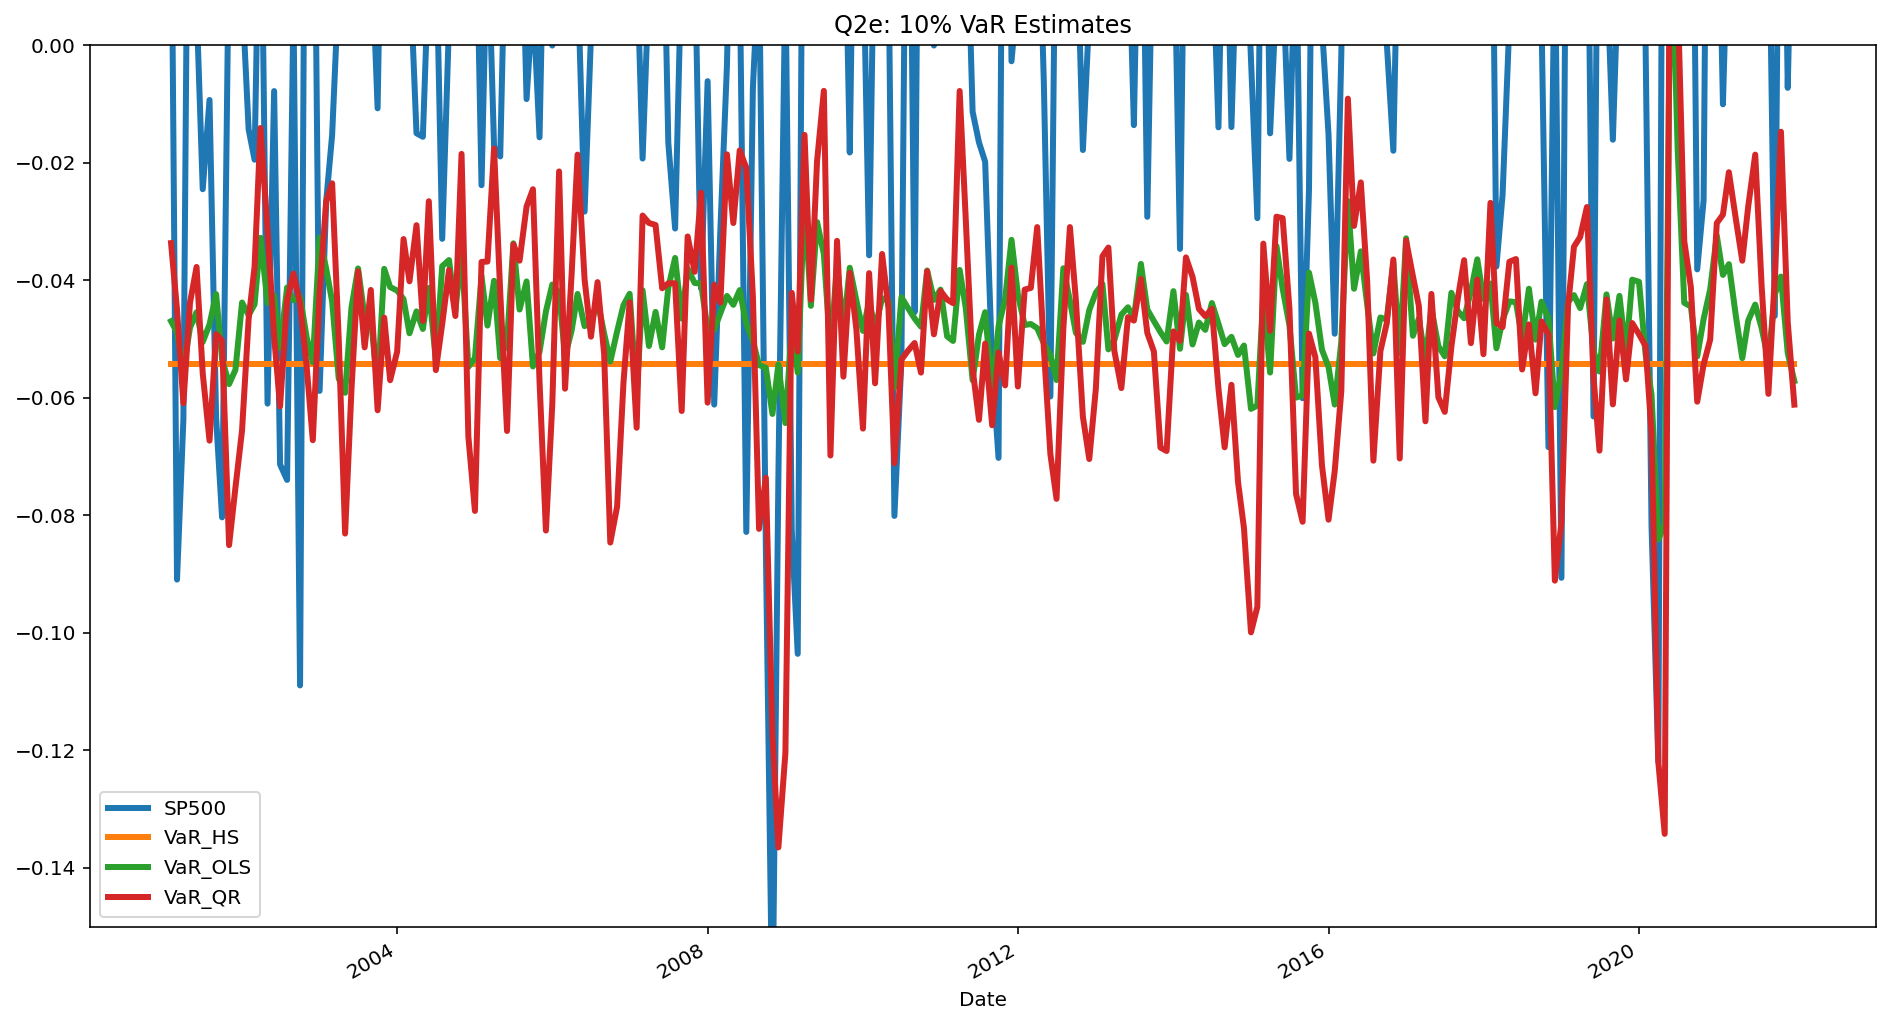

In [10]:
# First we'll set up the y and X variables
The_y = RawData['SP500']
The_X = sm.add_constant(RawData[['Inflation_CPI', 'Oil Prices']])
alpha = 0.10
# Now we'll calculate the VaR's
VaR_HS, ES_HS = Q2a_HS(The_y, alpha)
VaR_OLS = Q2B_OLS(The_y, The_X, alpha)
VaR_QR = Q2C_QR(The_y, The_X, alpha)
# Let's plot them from a DataFrame
VaR10 = pd.DataFrame(RawData['SP500'])
VaR10['VaR_HS'] = VaR_HS
VaR10['VaR_OLS'] = VaR_OLS
VaR10['VaR_QR'] = VaR_QR
VaR10.plot(title='Q2e: 10% VaR Estimates',
           ylim=(-0.15, 0),
           figsize=(16, 9),
           linewidth=3)

YOUR ANSWER HERE

There's not a lot of difference in the coverage rates.

- OLS VaR seems to higher than the other two, on average.
- Logically, the HS and the QR should have correct coverage *in-sample*.<br>That suggests that the OLS VaR may not have correct coverage.



### Part f

Use `Q2A_HS()` to estimate the 10% VaR and ES for `SP500` using only the data before 2012. <br>Test both of those estimates for correct coverage using only the data *after* 2011. 

Report your test statistics and their p-values. 



In [11]:
# Let's recalculate both using only the data before 2012
VaR_HS, ES_HS = Q2a_HS(The_y[:'2011'], alpha)

# Testing the VaR for correct coverage means that we need to calculate the 'Hits'
Hits_HS = RawData['SP500']['2012':] < VaR_HS
# Now we can just use our solution to part (d)
Sign_Stat, Sign_pval = Q2D_Sign(Hits_HS, alpha)

print(
    f'The Sign Test statistic for the test of correct coverage is {Sign_Stat} and its p-value = {Sign_pval:.3f}.'
)

# Testing the ES for correct coverage means testing whether
#     the mean of the exceedence = 0
SP500_OOS = RawData['SP500']['2012':]
Excd_HS = SP500_OOS[Hits_HS] - VaR_HS  # Calculate the exceedence
# We'll test it using the one-sample t-test from SciPy stats
tstat, tpval = ss.ttest_1samp(Excd_HS, 0)

print(
    f'The t-statistic for the test of correct coverage is {tstat:.2f} and its p-value = {tpval:.3f}.'
)

The Sign Test statistic for the test of correct coverage is 4 and its p-value = 0.006.
The t-statistic for the test of correct coverage is -2.38 and its p-value = 0.098.


### Part g

Use your three series of VaR estimates from Part e above to test whether the 10% VaR estimates from `Q2a_HS()` have correct conditional coverage after conditioning on 
the 10% VaRs estimates from `Q2B_OLS()`, or on those from `Q2C_QR()`.

Do you reject either $H_0$ at the 5% level?



### SvN: 

I'd intended this problem to be run with the post-2011 sample (as a proper backtest.)

- However, the majority used the full sample to evaluate conditional coverage. 
- Because the question did not specify, I didn't penalize anyone for using the full sample. 
- I've corrected the solution to produce results using the full sample.



In [12]:
# There are several ways to do this.
# - 2-sample t-test for equal means when Hits_HS=True vs Hits_HS=False
# - correlation between Hits_HS and VaR_Other (simple correlation? or rank correlation? or run OLS and test the estimated coefficient?)


# First, let's set up the OOS VaR's for the OLS and QR models
# VaROOS_OLS = VaR10['VaR_OLS']['2012':]
# VaROOS_QR = VaR10['VaR_QR']['2012':]
VaROOS_OLS = VaR10['VaR_OLS']
VaROOS_QR = VaR10['VaR_QR']
Hits_HS = RawData['SP500'] < VaR_HS

# I'll use the 2-sample t-test first
print('\nUsing the 2-sample t-test with unequal variances....')
t_stat, t_pval = ss.ttest_ind(VaROOS_OLS[Hits_HS],
                              VaROOS_OLS[~Hits_HS],
                              equal_var=False)
print(
    f'OLS: t-statistic for Null Hypothesis of equal means = {t_stat:.2f}, which has a p-value = {t_pval:.3f}'
)
t_stat, t_pval = ss.ttest_ind(VaROOS_QR[Hits_HS],
                              VaROOS_QR[~Hits_HS],
                              equal_var=False)
print(
    f'QR: t-statistic for Null Hypothesis of equal means = {t_stat:.2f}, which has a p-value = {t_pval:.3f}'
)
# Looks like both reject the H0 of correct conditional coverage
# *** IF we allow for unequal variances across the two samples. ***
# IF we don't allow for unequal variances, we just get the OLS result (shown below.)

# I'll use the OLS approach next
print('\nUsing an OLS regression....')
OLSresults = sm.OLS(Hits_HS, sm.add_constant(VaROOS_OLS)).fit()
print(
    f'OLS: t-statistic for Null Hypothesis of no correlation = {OLSresults.tvalues[1]:.2f}, which has a p-value = {OLSresults.pvalues[1]:.3f}'
)
QRresults = sm.OLS(Hits_HS, sm.add_constant(VaROOS_QR)).fit()
print(
    f'QR: t-statistic for Null Hypothesis of no correlation = {QRresults.tvalues[1]:.2f}, which has a p-value = {QRresults.pvalues[1]:.3f}'
)

# What if we use a non-parametric test?
print("\nUsing Spearman's rank correlation....")
from scipy.stats import spearmanr

OLS_rho, OLS_pval = spearmanr(Hits_HS, VaROOS_OLS)
print(
    f"OLS: Spearman's rho = {OLS_rho:.2f}, and the null of no correlation has a p-value = {OLS_pval:.3f}"
)
QR_rho, QR_pval = spearmanr(Hits_HS, VaROOS_QR)
print(
    f"OLS: Spearman's rho = {QR_rho:.2f}, and the null of no correlation has a p-value = {QR_pval:.3f}"
)


Using the 2-sample t-test with unequal variances....
OLS: t-statistic for Null Hypothesis of equal means = -3.44, which has a p-value = 0.003
QR: t-statistic for Null Hypothesis of equal means = -2.54, which has a p-value = 0.020

Using an OLS regression....
OLS: t-statistic for Null Hypothesis of no correlation = -3.78, which has a p-value = 0.000
QR: t-statistic for Null Hypothesis of no correlation = -3.68, which has a p-value = 0.000

Using Spearman's rank correlation....
OLS: Spearman's rho = -0.23, and the null of no correlation has a p-value = 0.000
OLS: Spearman's rho = -0.18, and the null of no correlation has a p-value = 0.004


If we use the 2\-sample _t_\-test, we reject the $H_0$ of correct conditional coverage for the Historical Simulation.

However, if we use the OLS regression \(or impose the restriction of equal variance in the 2\-sample t\-test\), then we easily reject $H_0$.

The Spearman rank correlation also rejects the $H_0$ of correct conditional coverage.

